In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
from datetime import timedelta, datetime
from matplotlib import font_manager, rc
from matplotlib.ticker import MaxNLocator

from IPython.display import Image # 이미지 삽입

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams['font.size'] = 25

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

In [2]:
# outliar 제거 함수 (IQR 설정)
def remove_out(*dataframes, remove_col) :
    for i, dataframe in enumerate(dataframes) :
        for k in remove_col :
            level_1q = dataframe[k].quantile(0.25)
            level_3q = dataframe[k].quantile(0.75)
            IQR = level_3q - level_1q
            rev_range = 10
            
            outliar_h = dataframe[k] >= level_3q + (rev_range * IQR)
            outliar_l = dataframe[k] <= level_1q - (rev_range * IQR)

            a=dataframe[outliar_h].index
            b=dataframe[outliar_l].index
            
            print(dataframe.name,":",[a,b],"\n")
            
            dataframe.drop(a, inplace=True)
            dataframe.drop(b, inplace=True)

#그래프 2개 비교 (차이 비교) -- 숫자를 표시안함
def difference(dataframe1, dataframe2) :    
    diff = np.subtract(dataframe1,dataframe2)
    
    # diff가 0보다 작은 index 찾는 것
    diff_down = dataframe2.loc[diff.loc[diff < 0].index]
    display(diff_down.index)
    
    # diff의 값을 평균내는 부분
    print(diff.describe())
    
    # 20%인 위치 값 찾기
    try :
        sorted_diff = diff.sort_values()
        ten_percent_index = int(len(sorted_diff) * 0.1)
        ten_percent_value = sorted_diff.iloc[ten_percent_index]
        print("10% value: ", ten_percent_value)
    except IndexError as e:
        if "single positional indexer is out-of-bounds" in str(e):
            print("매우나쁨 농도가 없습니다.")
        else:
            raise e
    finally :
        # 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정
        plt.plot(dataframe1.index,diff)
        for i in range(len(dataframe1.index)):
            height = diff[i]
            plt.text(dataframe1.index[i], height + 0.01, '%.2f' %height, ha='center', va='bottom', size = 25)
        plt.title("Difference between airm-airKorea")
        plt.xlabel("Hour")
        plt.ylabel("diff")
        plt.show()
    
# 아림의 미세먼지 농도가 매우나쁨 이상일 때, airKorea의 미세먼지 농도의 평가
def air_quality_label(pm25):
    if pm25 <= 15:
        return '좋음'
    elif pm25 <= 35:
        return '보통'
    elif pm25 <= 75:
        return '나쁨'
    else:
        return '매우 나쁨'

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


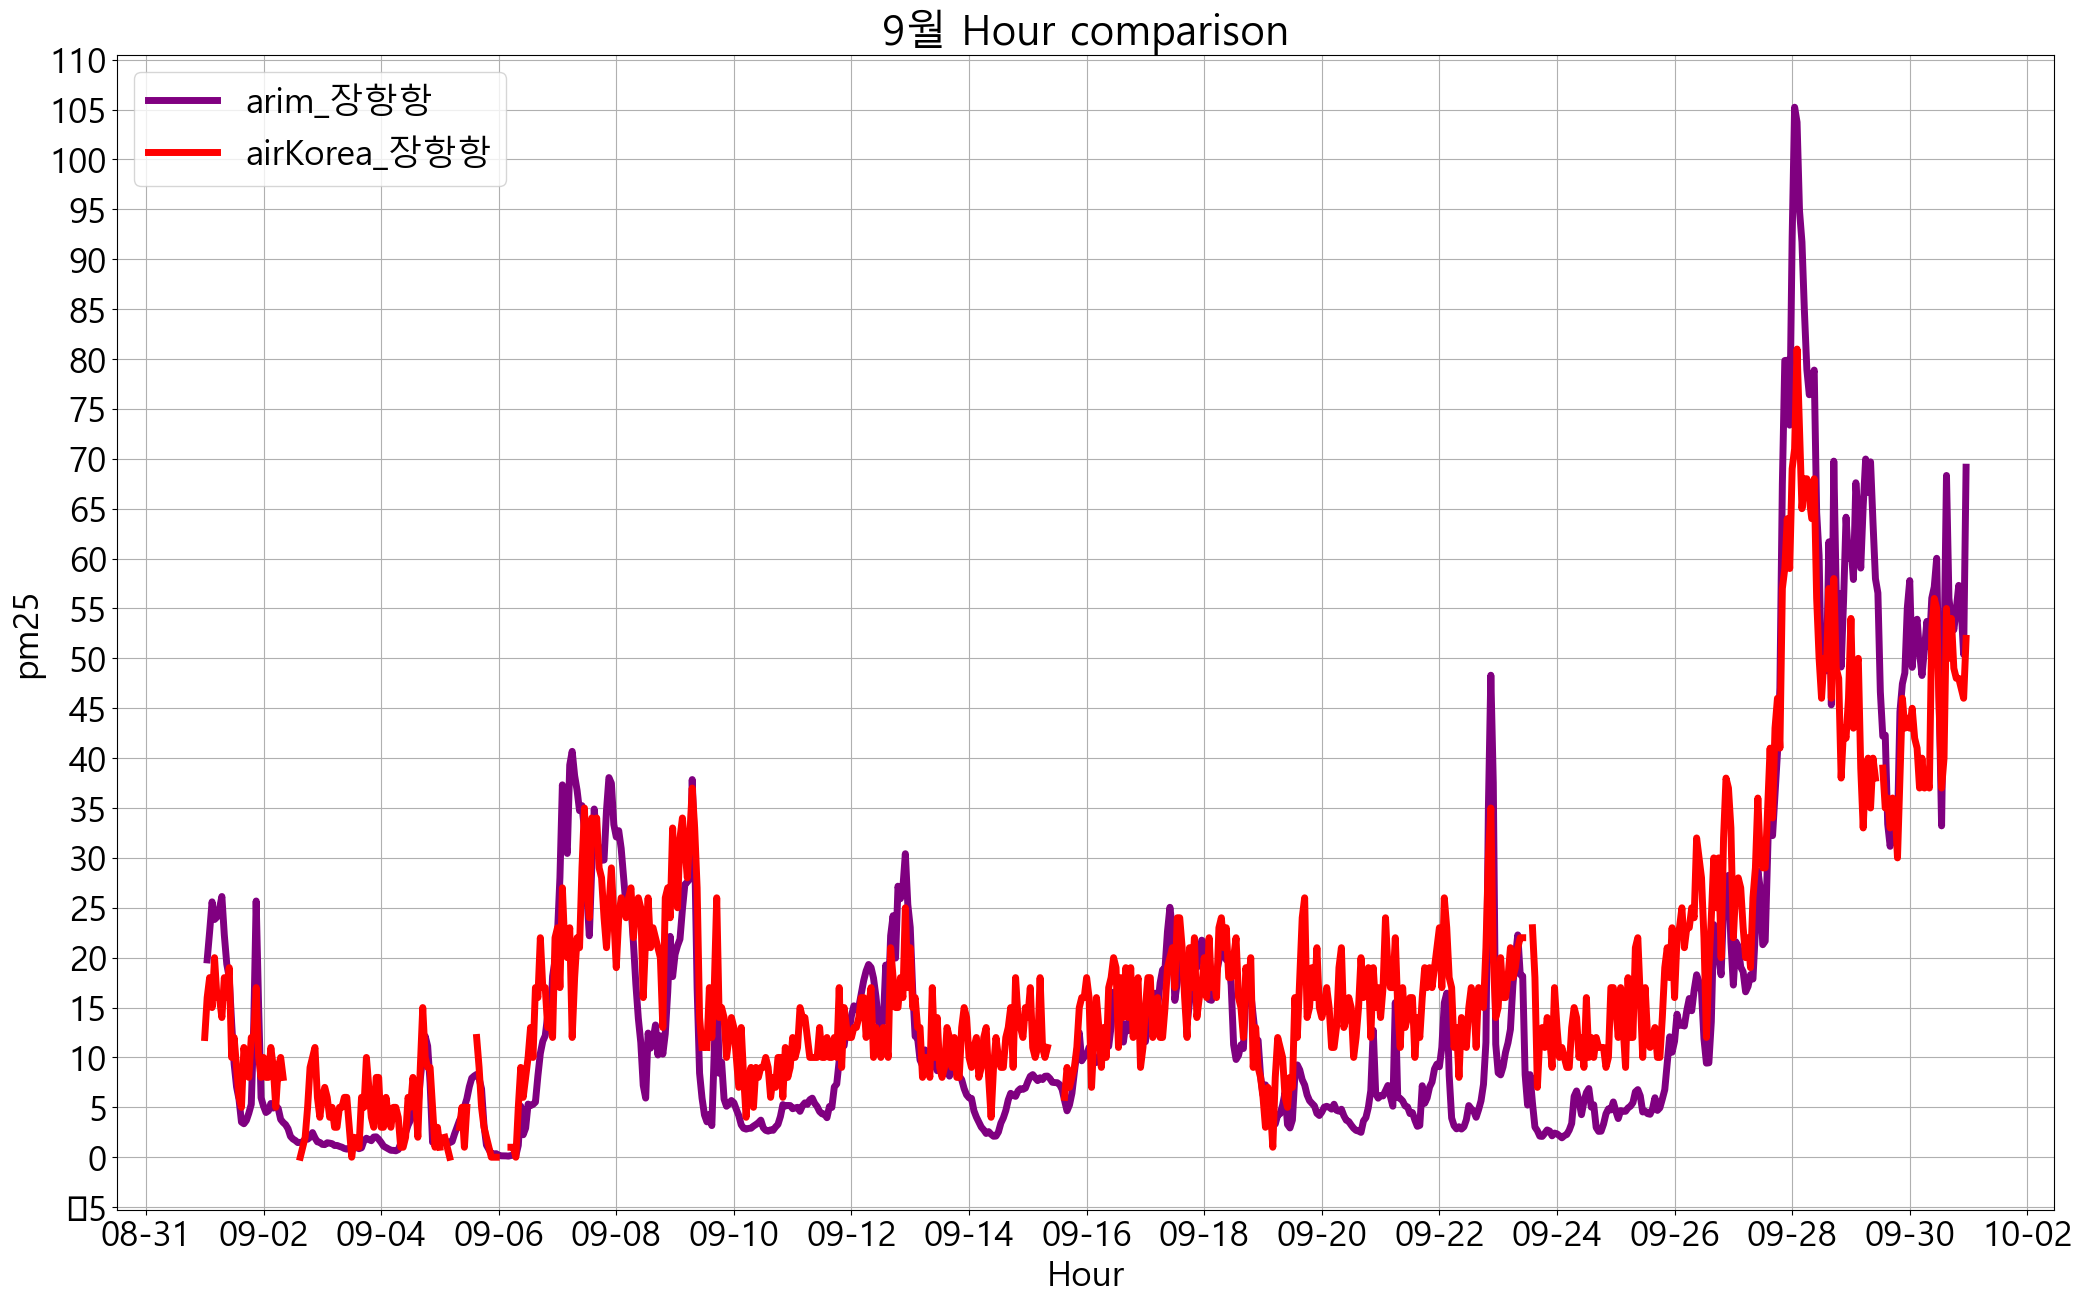

In [3]:
arim_data = pd.read_csv('./비교/장항항/9월/OA200#1_9월 MA.csv')
airKorea_data = pd.read_csv('./비교/장항항/9월/airkorea_장항항_9월.csv')

arim_data['date'] = arim_data.date.apply(pd.to_datetime)
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

arim_data = arim_data.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=25))
plt.plot(arim_data.index, arim_data['PM2.5'], color="purple", linewidth="5")
plt.plot(airKorea_data.index, airKorea_data['PM2.5'], color="red", linewidth="5")
plt.xlabel('Hour')
plt.ylabel('pm25')
plt.legend(('arim_장항항','airKorea_장항항'))
plt.title('9월 Hour comparison')
plt.grid()
plt.show()

In [81]:
# arim 장항항 2022년 9월~12월
arim_data_12 = pd.read_csv('./비교/장항항/12월/OA200#1_12월 MA.csv')
arim_data_9 = pd.read_csv('./비교/장항항/9월/OA200#1_9월 MA.csv')
arim_data_10 = pd.read_csv('./비교/장항항/10월/OA200#1_10월 MA.csv')
arim_data_11 = pd.read_csv('./비교/장항항/11월/OA200#1_11월 MA.csv')

# airKorea 장항항 2022년 9월~12월
airKorea_data_12 = pd.read_csv('./비교/장항항/12월/airkorea_장항항_12월.csv')
airKorea_data_9 = pd.read_csv('./비교/장항항/9월/airkorea_장항항_9월.csv')
airKorea_data_10 = pd.read_csv('./비교/장항항/10월/airkorea_장항항_10월.csv')
airKorea_data_11 = pd.read_csv('./비교/장항항/11월/airkorea_장항항_11월.csv')

arim_data = pd.concat([arim_data_9, arim_data_10, arim_data_11, arim_data_12])
airKorea_data = pd.concat([airKorea_data_9, airKorea_data_10, airKorea_data_11, airKorea_data_12])

# 이름 설정
arim_data.name = '아림'
airKorea_data.name = '에어코리아'

# outliar 제거
remove_out(arim_data, airKorea_data, remove_col=['PM2.5'])

# 인덱스 설정
arim_data['date'] = arim_data.date.apply(pd.to_datetime)
airKorea_data['date'] = airKorea_data.date.apply(pd.to_datetime)

arim_data = arim_data.groupby([pd.Grouper(key='date', freq='H')]).mean()
airKorea_data = airKorea_data.groupby([pd.Grouper(key='date', freq='H')]).mean()

# arim 데이터 수정
arim_data_76 = arim_data.loc[arim_data.loc[arim_data['PM2.5'] >= 76].index]
arim_data_76['PM2.5'] -= 10.65

# arim 데이터 수정 후 대입
arim_data.loc[arim_data_76.index, 'PM2.5'] = arim_data_76['PM2.5']

# 좋음,보통,나쁨,매우나쁨 기준 나누기
airKorea_data['air_quality_label_air'] = airKorea_data['PM2.5'].apply(lambda x: air_quality_label(x))
arim_data['air_quality_label_arim'] = arim_data['PM2.5'].apply(lambda x: air_quality_label(x))

result = pd.concat([arim_data, airKorea_data], axis=1)
result.drop(['PM10','O3','NO2','CO','SO2','Unnamed: 7'],axis=1, inplace=True)
result = result.sort_index()


# arim과 air이 같을때를 따로 찾아보기
mask = result['air_quality_label_arim'] == result['air_quality_label_air']
result_1 = result[mask]
result_1.dropna(inplace=True)

display(result_1)

# arim과 air이 다를때를 따로 찾아보기
mask = result['air_quality_label_arim'] != result['air_quality_label_air']
result_2 = result[mask]
result_2.dropna(inplace=True)

display(result_2)

# # 데이터 프레임 한번에 전체 다 보기
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(result)
# print(result.info())

# 아림 데이터가 좋음, 보통, 나쁨, 매우나쁨 일때의 air데이터의 label 확인
result_groupby = result_2.groupby('air_quality_label_arim')

good_quality_data = result_groupby.get_group('좋음')
normal_quality_data = result_groupby.get_group('보통')
bad_quality_data = result_groupby.get_group('나쁨')
very_bad_quality_data = result_groupby.get_group('매우 나쁨')



아림 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 

에어코리아 : [Int64Index([], dtype='int64'), Int64Index([], dtype='int64')] 



,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-01 01:00:00,19.778333,보통,16.0,보통
2022-09-01 02:00:00,22.600000,보통,18.0,보통
2022-09-01 04:00:00,23.825000,보통,20.0,보통
2022-09-01 05:00:00,24.070000,보통,16.0,보통
2022-09-01 06:00:00,24.886667,보통,16.0,보통
...,...,...,...,...
2022-12-28 19:00:00,17.955000,보통,22.0,보통
2022-12-28 20:00:00,19.533333,보통,18.0,보통
2022-12-28 21:00:00,20.795000,보통,25.0,보통


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-01 03:00:00,25.593333,보통,15.0,좋음
2022-09-01 07:00:00,26.130000,보통,14.0,좋음
2022-09-01 22:00:00,15.135000,보통,10.0,좋음
2022-09-06 15:00:00,5.525000,좋음,17.0,보통
2022-09-06 16:00:00,8.140000,좋음,16.0,보통
...,...,...,...,...
2022-12-26 07:00:00,40.795000,나쁨,28.0,보통
2022-12-26 08:00:00,40.468333,나쁨,33.0,보통
2022-12-26 19:00:00,37.518333,나쁨,31.0,보통


DatetimeIndex(['2022-09-01 10:00:00', '2022-09-06 23:00:00',
               '2022-09-07 00:00:00', '2022-09-07 11:00:00',
               '2022-09-07 12:00:00', '2022-09-07 13:00:00',
               '2022-09-07 14:00:00', '2022-09-07 16:00:00',
               '2022-09-08 05:00:00', '2022-09-08 06:00:00',
               ...
               '2022-12-26 15:00:00', '2022-12-26 16:00:00',
               '2022-12-26 17:00:00', '2022-12-26 18:00:00',
               '2022-12-28 14:00:00', '2022-12-28 15:00:00',
               '2022-12-28 18:00:00', '2022-12-28 19:00:00',
               '2022-12-28 21:00:00', '2022-12-28 22:00:00'],
              dtype='datetime64[ns]', name='date', length=663, freq=None)

count    826.000000
mean      -4.219091
std        5.435277
min      -27.555000
25%       -7.922500
50%       -4.595833
75%       -1.038757
max       13.748333
Name: PM2.5, dtype: float64
10% value:  -10.34


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

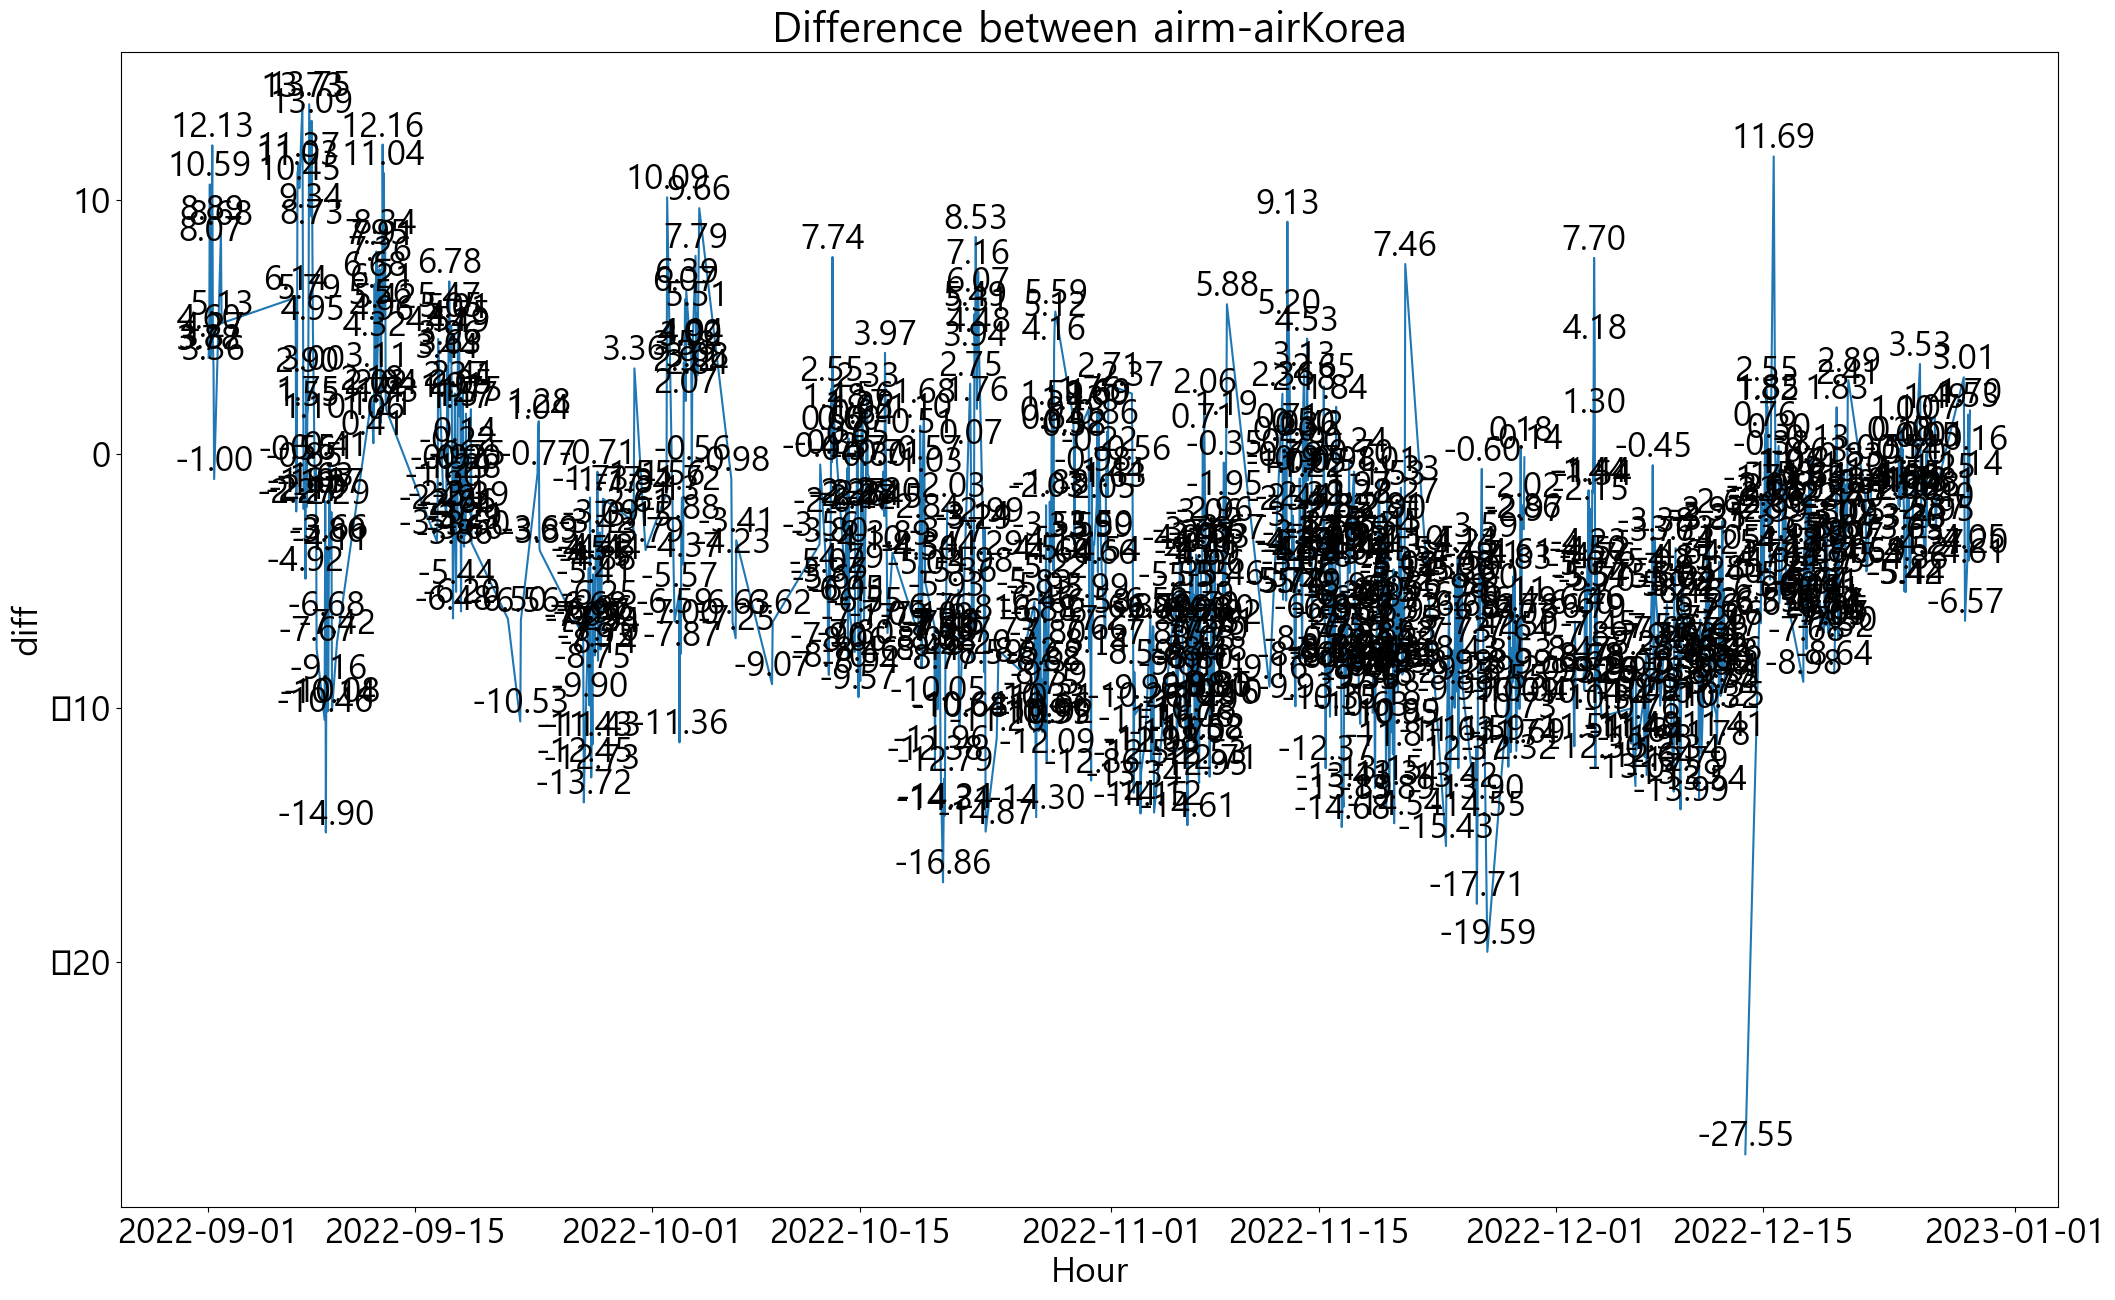

In [85]:
arim_data_1 = arim_data.loc[arim_data.loc[(arim_data['PM2.5'] > 15) & (arim_data['PM2.5'] <= 35)].index]
airKorea_data_1 = airKorea_data.loc[arim_data.loc[(arim_data['PM2.5'] > 15) & (arim_data['PM2.5'] <= 35)].index]

difference(arim_data_1['PM2.5'], airKorea_data_1['PM2.5'])

In [31]:
# arim이 좋음일 때, air이 나쁨, 매우나쁨일 경우
filtered_data = good_quality_data[good_quality_data['air_quality_label_air'].isin(['나쁨', '매우나쁨'])]
display(filtered_data)

# arim이 보통일 때, air이 나쁨과 매우나쁨일 경우
filtered_data = normal_quality_data[normal_quality_data['air_quality_label_air'].isin(['나쁨', '매우나쁨'])]
display(filtered_data)

# arim이 나쁨일 때, air이 좋음과 보통일 경우
filtered_data = bad_quality_data[bad_quality_data['air_quality_label_air'].isin(['좋음', '보통'])]
display(filtered_data)

# arim이 매우나쁨일 때, air이 좋음과 보통일 경우
filtered_data = very_bad_quality_data[very_bad_quality_data['air_quality_label_air'].isin(['좋음', '보통'])]
display(filtered_data)

,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-26 21:00:00,25.265000,보통,38.0,나쁨
2022-09-26 22:00:00,28.251667,보통,37.0,나쁨
2022-09-27 10:00:00,28.708333,보통,36.0,나쁨
2022-09-29 15:00:00,33.390000,보통,36.0,나쁨
2022-09-29 17:00:00,32.850000,보통,36.0,나쁨
...,...,...,...,...
2022-12-12 10:00:00,32.693333,보통,42.0,나쁨
2022-12-13 19:00:00,24.445000,보통,52.0,나쁨
2022-12-20 04:00:00,32.325000,보통,36.0,나쁨


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-07 02:00:00,37.320000,나쁨,27.0,보통
2022-09-07 05:00:00,39.310000,나쁨,23.0,보통
2022-09-07 06:00:00,40.676667,나쁨,12.0,좋음
2022-09-07 07:00:00,38.245000,나쁨,18.0,보통
2022-09-07 08:00:00,36.778333,나쁨,22.0,보통
...,...,...,...,...
2022-12-26 05:00:00,36.578333,나쁨,30.0,보통
2022-12-26 06:00:00,37.078333,나쁨,34.0,보통
2022-12-26 07:00:00,40.795000,나쁨,28.0,보통


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,


In [33]:
# arim이 보통일 때, air이 나쁨일 경우
filtered_data = normal_quality_data[normal_quality_data['air_quality_label_air'].isin(['나쁨'])]
display(filtered_data)

# arim이 보통일 때, air이 매우 나쁨일 경우
filtered_data = normal_quality_data[normal_quality_data['air_quality_label_air'].isin(['매우 나쁨'])]
display(filtered_data)

# arim이 나쁨일 때, air이 좋음일 경우
filtered_data = bad_quality_data[bad_quality_data['air_quality_label_air'].isin(['좋음'])]
display(filtered_data)

# arim이 나쁨일 때, air이 보통일 경우
filtered_data = bad_quality_data[bad_quality_data['air_quality_label_air'].isin(['보통'])]
display(filtered_data)

,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-26 21:00:00,25.265000,보통,38.0,나쁨
2022-09-26 22:00:00,28.251667,보통,37.0,나쁨
2022-09-27 10:00:00,28.708333,보통,36.0,나쁨
2022-09-29 15:00:00,33.390000,보통,36.0,나쁨
2022-09-29 17:00:00,32.850000,보통,36.0,나쁨
...,...,...,...,...
2022-12-12 10:00:00,32.693333,보통,42.0,나쁨
2022-12-13 19:00:00,24.445000,보통,52.0,나쁨
2022-12-20 04:00:00,32.325000,보통,36.0,나쁨


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-07 06:00:00,40.676667,나쁨,12.0,좋음


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-07 02:00:00,37.320000,나쁨,27.0,보통
2022-09-07 05:00:00,39.310000,나쁨,23.0,보통
2022-09-07 07:00:00,38.245000,나쁨,18.0,보통
2022-09-07 08:00:00,36.778333,나쁨,22.0,보통
2022-09-07 10:00:00,35.238333,나쁨,29.0,보통
...,...,...,...,...
2022-12-26 05:00:00,36.578333,나쁨,30.0,보통
2022-12-26 06:00:00,37.078333,나쁨,34.0,보통
2022-12-26 07:00:00,40.795000,나쁨,28.0,보통


arim이 좋음일 때, air이 나쁨, 매우나쁨일 경우가 X   

-> air이 나쁨일 때 arim이 좋음 일 경우 X, air이 매우 나쁨일 때, arim이 좋음 일 경우 X

---
arim이 매우나쁨일 때, air이 좋음과 보통일 경우가 X   

-> air이 좋음일 때 arim이 매우나쁨일 경우 X, air이 보통일 때, arim이 매우나쁨일 경우 X

---


,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-26 21:00:00,25.265000,보통,38.0,나쁨
2022-09-26 22:00:00,28.251667,보통,37.0,나쁨
2022-09-27 10:00:00,28.708333,보통,36.0,나쁨
2022-09-29 15:00:00,33.390000,보통,36.0,나쁨
2022-09-29 17:00:00,32.850000,보통,36.0,나쁨
...,...,...,...,...
2022-12-12 10:00:00,32.693333,보통,42.0,나쁨
2022-12-13 19:00:00,24.445000,보통,52.0,나쁨
2022-12-20 04:00:00,32.325000,보통,36.0,나쁨


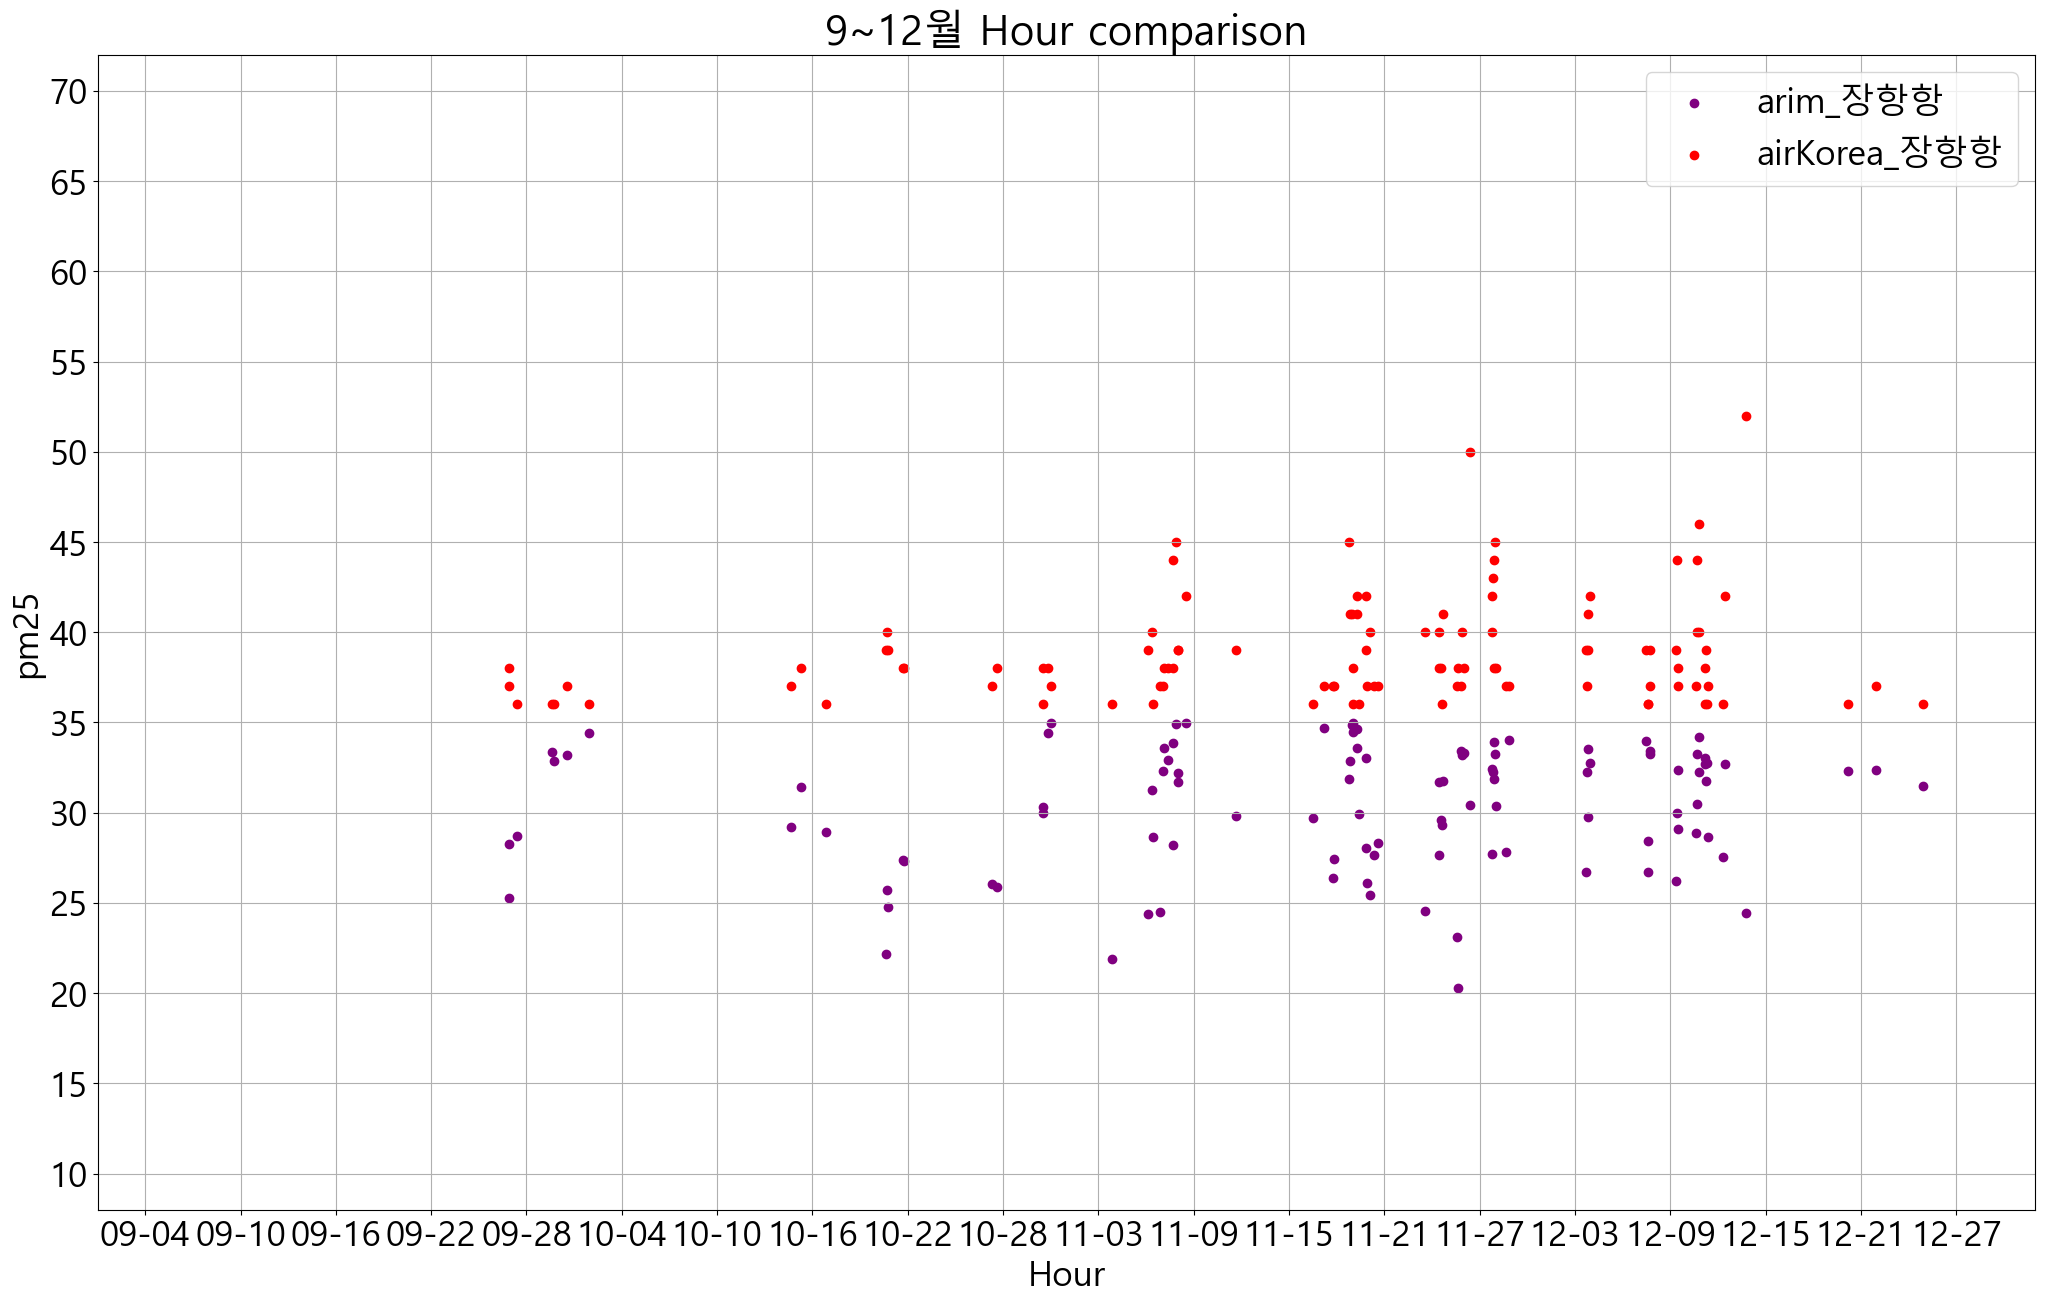

In [59]:
# arim이 보통일 때, air이 나쁨과 매우나쁨일 경우
filtered_data = normal_quality_data[normal_quality_data['air_quality_label_air'].isin(['나쁨', '매우나쁨'])]
display(filtered_data)

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
plt.scatter(filtered_data.index, filtered_data.iloc[:,0], color="purple")
plt.scatter(filtered_data.index, filtered_data.iloc[:,2], color="red" )
plt.xlabel('Hour')
plt.ylabel('pm25')
plt.xlim(pd.to_datetime('2022-09-01 00:00:00'), pd.to_datetime('2022-12-31 23:00:00'))
plt.ylim(8, 72)
plt.legend(('arim_장항항','airKorea_장항항'))
plt.title('9~12월 Hour comparison')
plt.grid()
plt.show()

,PM2.5,air_quality_label_arim,PM2.5,air_quality_label_air
date,,,,
2022-09-07 02:00:00,37.320000,나쁨,27.0,보통
2022-09-07 05:00:00,39.310000,나쁨,23.0,보통
2022-09-07 06:00:00,40.676667,나쁨,12.0,좋음
2022-09-07 07:00:00,38.245000,나쁨,18.0,보통
2022-09-07 08:00:00,36.778333,나쁨,22.0,보통
...,...,...,...,...
2022-12-26 05:00:00,36.578333,나쁨,30.0,보통
2022-12-26 06:00:00,37.078333,나쁨,34.0,보통
2022-12-26 07:00:00,40.795000,나쁨,28.0,보통


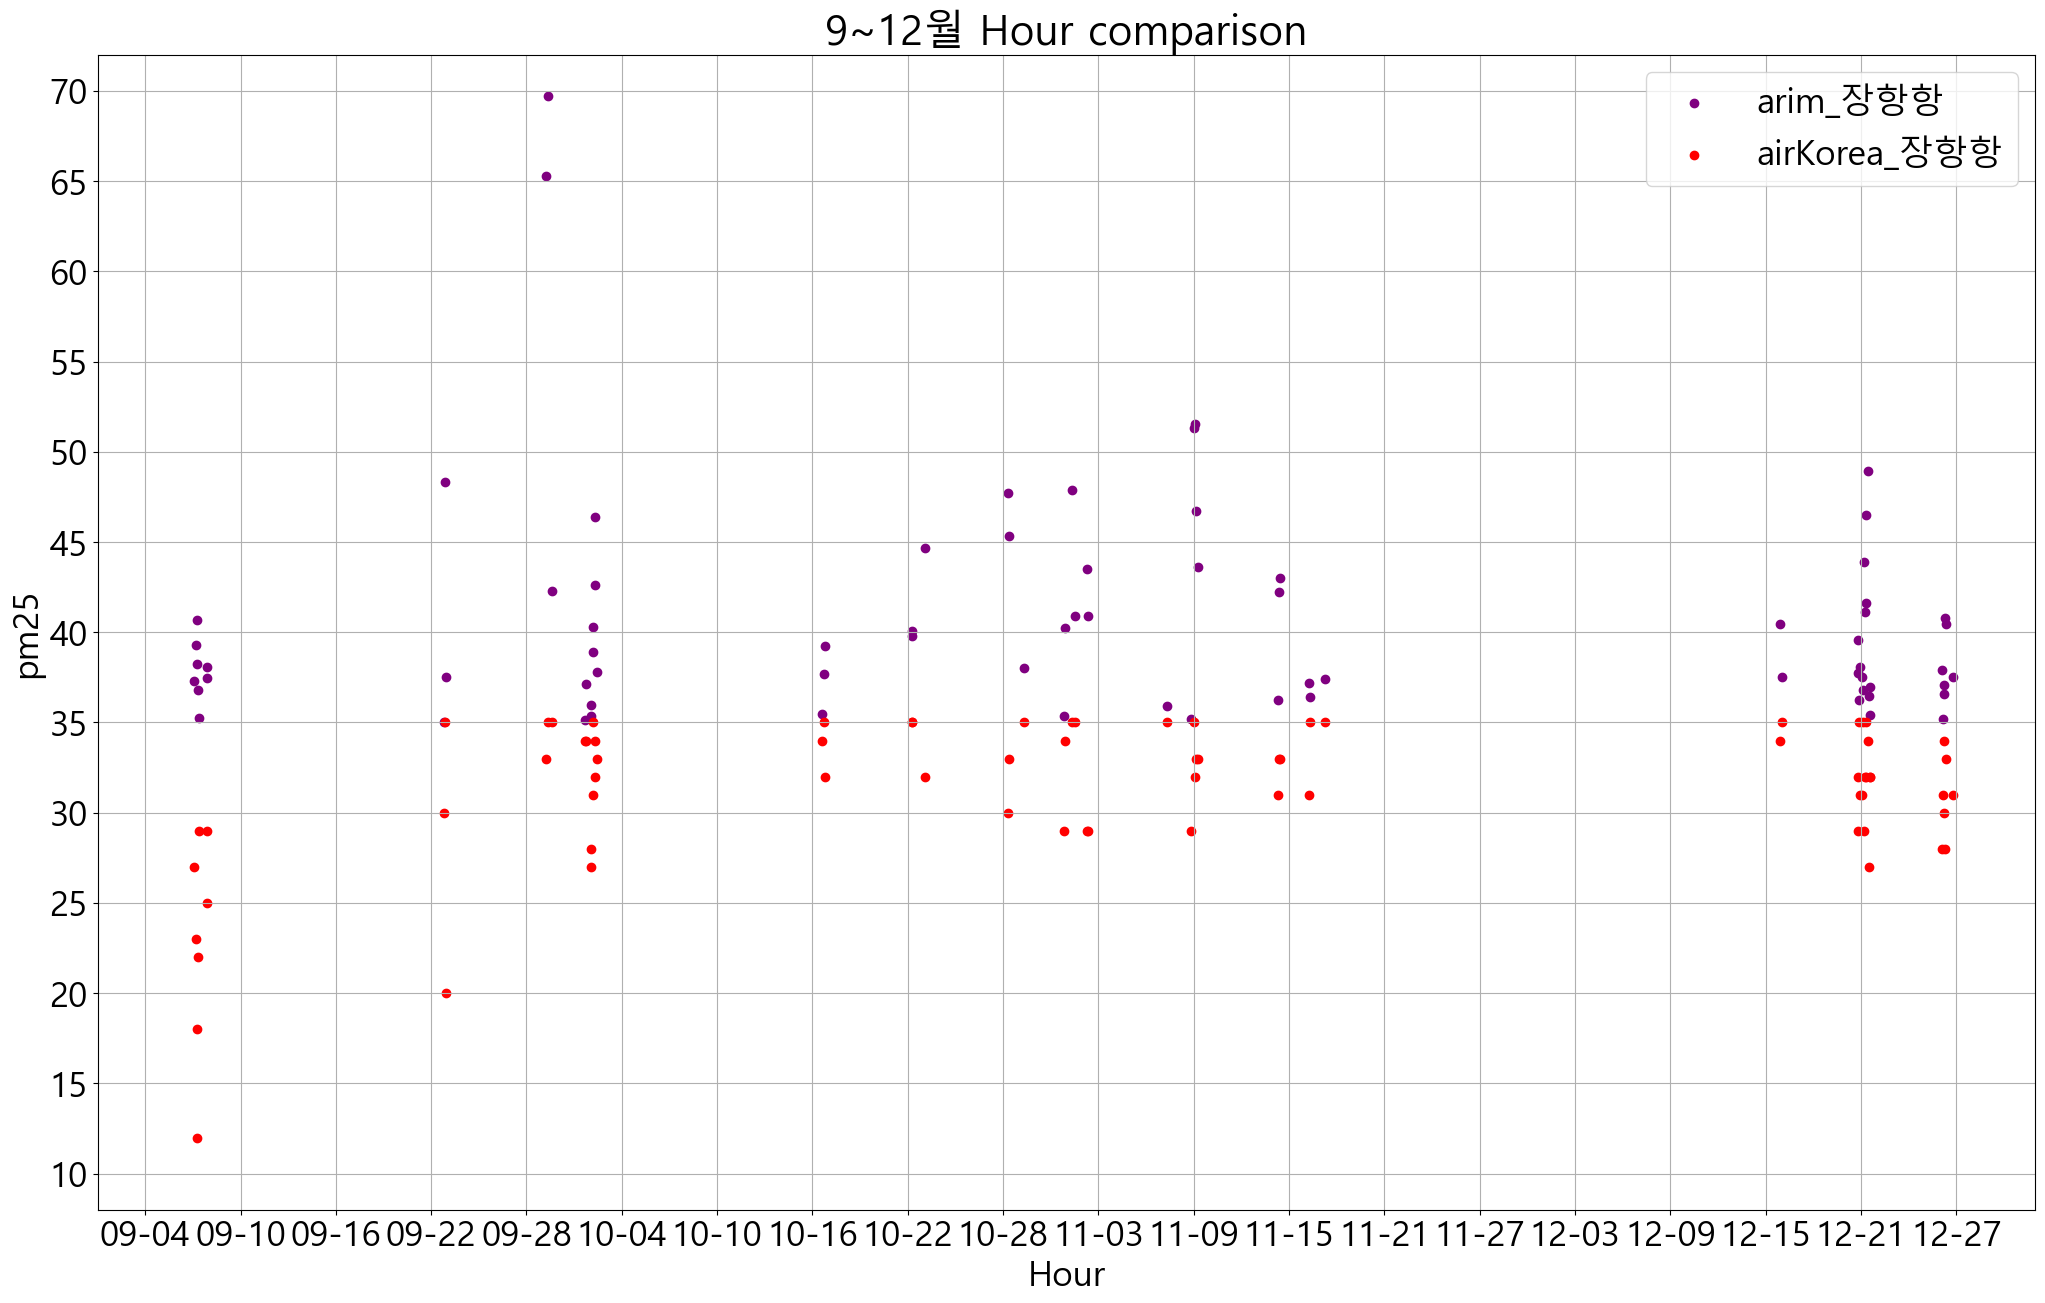

In [60]:
# arim이 나쁨일 때, air이 좋음과 보통일 경우
filtered_data = bad_quality_data[bad_quality_data['air_quality_label_air'].isin(['좋음', '보통'])]
display(filtered_data)

# 그래프 2개 비교
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
plt.scatter(filtered_data.index, filtered_data.iloc[:,0], color="purple")
plt.scatter(filtered_data.index, filtered_data.iloc[:,2], color="red" )
plt.xlabel('Hour')
plt.ylabel('pm25')
plt.xlim(pd.to_datetime('2022-09-01 00:00:00'), pd.to_datetime('2022-12-31 23:00:00'))
plt.ylim(8, 72)
plt.legend(('arim_장항항','airKorea_장항항'))
plt.title('9~12월 Hour comparison')
plt.grid()
plt.show()

모든 데이터를 조사해보았을 때,   
내린 결론   
-> air가 좋음일 때, arim이 나쁨인 데이터가 한번만 존재하였음 -> 이것은 아웃라이어 처리가 불가능함 이것은 배제하고 생각   
-> 보통과 나쁨의 차이나는 개수가 전체 2726개 중 178개 확률은 약 6.53%

air와 arim의 차이가
매우나쁨과 나쁨이 다른 것과 좋음과 보통이 다른것들은 맞다고 가정하고
데이터의 차이나는 개수 782개 중 178개 확률은 약 22.76%
이 확률을 줄일 수 있는 방안으로 생각해보자
-> 아림의 값이 보통일 때, air의 값이 나쁨일 경우가 더 많았음 그렇지만 둘 다 비슷함.
따라서 그 기간일 때의 날짜를 확실하게 살펴보자

arim이 보통일 때의 개수를 세어보니 826개 였는데, 105개의 데이터를 수정하기 위해서 보통의 데이터를 수정하는 건 맞지 않으므로, 수정하지 않고
그대로 가져가기로 결정

-> 원래 보통과 보통으로 같은데 더해주는 순간 arim이 나쁨으로 변질되는 데이터가 많을 가능성이 크다!